In [231]:
from RidgeTrough.data_matching import CDFDay
from RidgeTrough.cdf_data import CDFData
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
%matplotlib inline
import numpy as np
import os

In [3]:
DATA_ROOT = r"/mnt/d/code/WeatherData/"
year = 2000
hgt_path = os.path.join(DATA_ROOT,"hgts",f'hgt.{year}.nc')
uwnd_path = os.path.join(DATA_ROOT,"u_winds",f'uwnd.{year}.nc')
vwnd_path = os.path.join(DATA_ROOT,"v_winds",f'vwnd.{year}.nc')
cdf = CDFData(hgt_path = hgt_path)#,uwind_path= uwnd_path, vwind_path=vwnd_path)

INFO:root: 10:20:02 - Retrieved 2000 hgt data


(<Figure size 1500x400 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Geopotential Heights'}>)

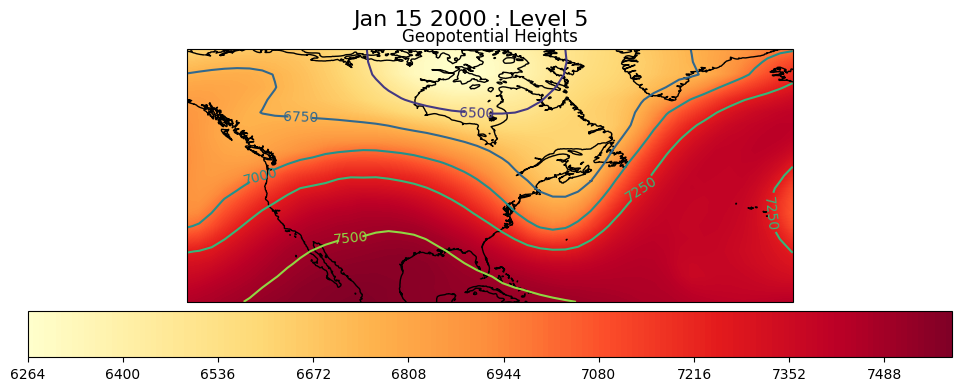

In [4]:
cdf.plot('hgts', 15, 5)

In [58]:
lat0=-10; lat1=70; lon0=-140; lon1=-20
lat_mask = ((cdf.lats >= lat0) & (cdf.lats <= lat1))
loc_lats = cdf.lats[lat_mask]

lon_mask = ((cdf.lons >= lon0) & (cdf.lons <= lon1))
loc_lons = cdf.lons[lon_mask]

start_lat = np.argwhere(lat_mask).min()
end_lat = np.argwhere(lat_mask).max()

start_lon = np.argwhere(lon_mask).min()
end_lon = np.argwhere(lon_mask).max()

print(cdf.hgts[...,start_lat+1:end_lat, start_lon+1:end_lon].shape)
print(cdf.hgts[...,10:20, 10:30].shape)

(366, 12, 31, 47)
(366, 12, 10, 20)


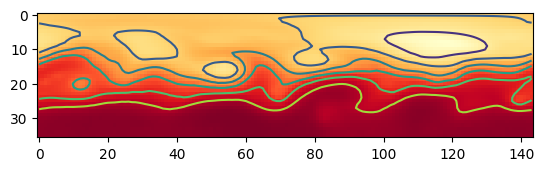

In [144]:
trunc_hgts = cdf.hgts[7,5,:(len(cdf.lats) //2),:]
plt.imshow(trunc_hgts,cmap='YlOrRd')
plt.contour(trunc_hgts)

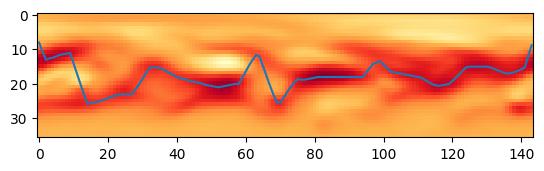

In [122]:
trunc_hgts = cdf.hgts[7,5,:(len(cdf.lats) //2),:]
hgts = ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = hgts - shift_mat
plt.imshow(diff_mat ,cmap='YlOrRd')

maxs = np.argmax(diff_mat, axis=0)
kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(maxs, kernel, mode='same')
plt.plot(data_convolved)

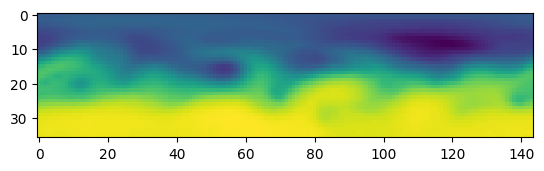

In [146]:
plt.imshow(trunc_hgts)

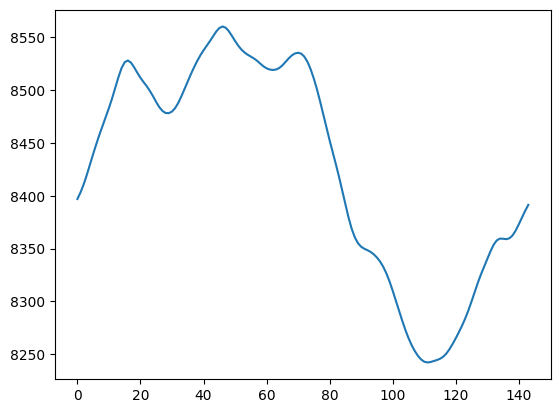

In [161]:
plt.plot(trunc_hgts[5,:])

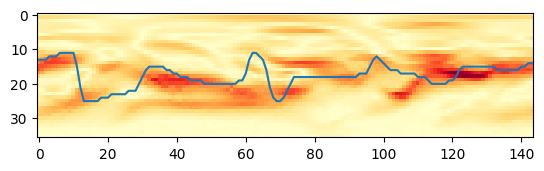

In [181]:
trunc_hgts = cdf.hgts[3,5,:(len(cdf.lats) //2),:]
hgts = trunc_hgts #ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = abs(hgts - shift_mat)
plt.imshow(diff_mat ,cmap='YlOrRd')
gauss_data = ndimage.gaussian_filter(maxs, 1, mode='wrap')
plt.plot(gauss_data)

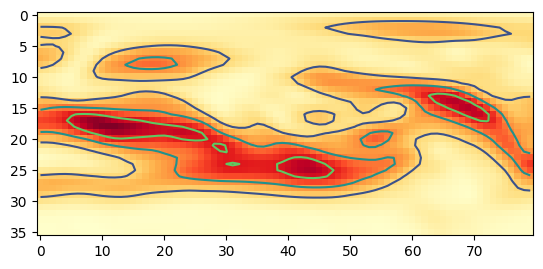

In [180]:
trunc_hgts = cdf.hgts[1,5,:(len(cdf.lats) //2),20:100]
hgts = trunc_hgts #ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = abs(hgts - shift_mat)
smooth_diff = ndimage.gaussian_filter(diff_mat, sigma=(1, 1), order=0)
plt.imshow(smooth_diff ,cmap='YlOrRd')
plt.contour(smooth_diff, levels=3)
# plt.plot(np.argmax(smooth_diff, axis=0))

In [185]:
import scipy.ndimage as ndimage

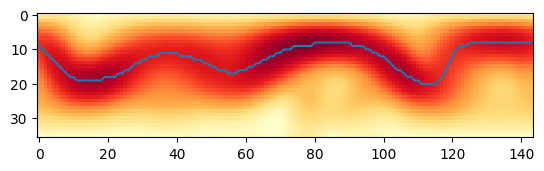

In [274]:
hgts = cdf.hgts[20,9,:(len(cdf.lats) //2),:]
grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=(5,2))
plt.imshow(grad,cmap='YlOrRd')
plt.plot(np.argmax(grad, axis=0))

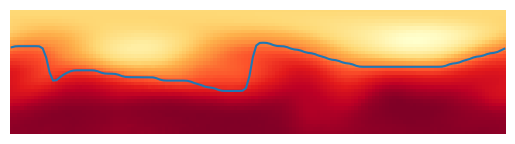

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

SIGMA = (5,2)
LEVEL = 9

fig, ax = plt.subplots()
ax.axis('off')
hgts = cdf.hgts[1,LEVEL,:(len(cdf.lats) //2),:]
grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
im = ax.imshow(hgts,cmap='YlOrRd')
ln, = ax.plot(np.argmax(grad, axis=0))

def init():
    hgts = cdf.hgts[1,LEVEL,:(len(cdf.lats) //2),:]
    grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
    maxs = np.argmax(grad, axis=0).astype(float)
    smooth_max = ndimage.gaussian_filter(maxs, 1, mode='wrap')
    ln.set_data(range(0,len(smooth_max)),smooth_max)
    im.set_data(hgts) # im.set_data(grad)
    return im,ln

def update(frame):
    hgts = cdf.hgts[frame,LEVEL,:(len(cdf.lats) //2),:]
    grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
    im.set_data(hgts)# im.set_data(grad)
    maxs = np.argmax(grad, axis=0).astype(float)
    smooth_max = ndimage.gaussian_filter(maxs, 1, mode='wrap')
    ln.set_data(range(0,len(smooth_max)),smooth_max)
    return im, ln

ani = FuncAnimation(fig, update, frames=range(2,100),
                    init_func=init, blit=True)

# ani = FuncAnimation(fig, update, frames=range(2,cdf.hgts.shape[0]-1),
#                     init_func=init, blit=True)
plt.show()

In [298]:
ani.save('lmao.gif')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


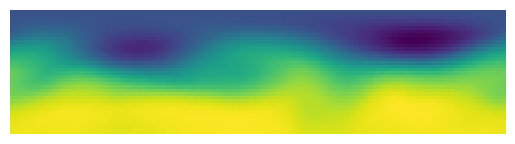

In [296]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(hgts)

What if we smooth in ALL directions???

In [334]:
all_hgts = cdf.hgts[...,:(len(cdf.lats) //2), :]
all_hgts.shape

(366, 12, 36, 144)

In [336]:
grad_tensor = np.zeros(all_hgts.shape)
for day in range(all_hgts.shape[0]):
    for level in range(all_hgts.shape[1]):
        grad_tensor[day, level] = ndimage.gaussian_gradient_magnitude(all_hgts[day, level,...], sigma=SIGMA)

In [328]:
# grad_tensor = ndimage.gaussian_gradient_magnitude(all_hgts, sigma=(0,0,*SIGMA))
# grad_tensor.shape

(366, 12, 36, 144)

In [343]:
maxs = np.argmax(grad_tensor, axis=2).astype(float)
maxs.shape # (day, level, longitude)

(366, 12, 144)

In [351]:
smooth_max = ndimage.gaussian_filter(maxs, (0.5,0.1,1), mode='wrap')
smooth_max.shape

(366, 12, 144)

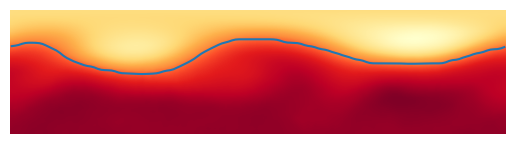

In [359]:
SIGMA = (5,2)
LEVEL = 10

fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow(all_hgts[1, LEVEL, ...], cmap='YlOrRd', interpolation='bilinear')
ln, = ax.plot(smooth_max[1, LEVEL, :])

def init():
    hgts = all_hgts[1, LEVEL, ...]
    smooth_max_i = smooth_max[1, LEVEL, :]
    ln.set_data(range(0,len(smooth_max_i)),smooth_max_i)
    im.set_data(hgts)
    return im,ln

def update(frame):
    hgts = all_hgts[frame, LEVEL, ...]
    smooth_max_i = smooth_max[frame, LEVEL, :]
    ln.set_data(range(0,len(smooth_max_i)),smooth_max_i)
    im.set_data(hgts)
    return im, ln

ani = FuncAnimation(fig, update, frames=range(2,100),
                    init_func=init, blit=True)

# ani = FuncAnimation(fig, update, frames=range(2,cdf.hgts.shape[0]-1),
#                     init_func=init, blit=True)
plt.show()

In [360]:
ani.save('smoothed_max_grads.gif')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>
